## Pendahuluan  
Dalam catatan sebelumnya kita telah mempelajari Jumlahan Riemann (*Riemann sum*). Sekarang kita lanjutkan mengenal dua aturan integrasi numerik yang lebih akurat pada partisi seragam, yakni aturan trapesium dan aturan Simpson.

Contoh dan ilustrasi akan menggunakan fungsi yang sama seperti sebelumnya:
$$
f(x)=\sin x,\quad a=0,\;b=\pi,\quad I_{\rm eksak}=2.
$$

## Aturan Trapesium (*Trapezoid Rule*)

<img src="../img/trapesium.png" alt="trapesium" width="400">

### Formula  
Partisi/bagi $[a,b]$ dengan $n$ sub‐interval seragam $h=(b-a)/n$.  
$$
T_n = h\Bigl[\tfrac12\,f(x_0) + f(x_1)+f(x_2)+\cdots+f(x_{n-1}) + \tfrac12\,f(x_n)\Bigr].
$$

### Galat  
Dengan asumsi $f''$ kontinu,  
$$
E_T = -\frac{(b-a)}{12}h^2\,f''(\xi),
\quad \xi\in[a,b],
$$  
sehingga orde konvergensi global $O(h^2)$.

(Catatan: penurunan formula dan galat akan menjadi bahan penugasan.)

## Aturan Simpson

<img src="../img/simpson.png" alt="simpson" width=400>

### Formula  
Simpson memakai parabola di tiap dua sub‐interval (maka $n$ harus genap):  
$$
S_n = \frac{h}{3}\Bigl[f(x_0)
+4\sum_{i=1,3,5,\dots}^{n-1} f(x_i)
+2\sum_{i=2,4,6,\dots}^{n-2} f(x_i)
+f(x_n)\Bigr].
$$

### Galat  
Dengan asumsi $f^{(4)}$ kontinu,  
$$
E_S = -\frac{(b-a)}{180}h^4\,f^{(4)}(\eta),
\quad \eta\in[a,b],
$$  
orde konvergensi global $O(h^4)$, jauh lebih cepat menurun daripada trapesium.

(Catatan: penurunan formula dan galat akan menjadi bahan penugasan.)


## Contoh Implementasi

Kita akan terapkan formula trapesium dan Simpson serta mengilustrasikan kedua metode tersebut:

- **Trapesium**: tiap panel diisi trapezium di bawah kurva.  
- **Simpson**: setiap dua panel diaproksimasi parabola, membentuk area lebih mendekati kurva.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi dan interval
def f(x): return np.sin(x)
a, b = 0.0, np.pi
exact = 2.0

# Trapesium
def trapezoid(f, a, b, n):
    xs = np.linspace(a, b, n+1)
    h = (b - a) / n
    return h*(0.5*f(xs[0]) + np.sum(f(xs[1:-1])) + 0.5*f(xs[-1]))

# Simpson (n genap)
def simpson(f, a, b, n):
    if n % 2 == 1:
        raise ValueError("n harus genap untuk Simpson")
    xs = np.linspace(a, b, n+1)
    h = (b - a) / n
    return (h/3)*(f(xs[0])
                  + 4*np.sum(f(xs[1:n:2]))
                  + 2*np.sum(f(xs[2:n-1:2]))
                  + f(xs[n]))

# Hitung untuk n = 4, 8, 16
results = []
for n in [4, 8, 16]:
    T = trapezoid(f, a, b, n)
    S = simpson(f, a, b, n)
    results.append({
        'n': n,
        'Trapezoid': T,
        'Error (Trap.)': T - exact,
        'Simpson': S,
        'Error (Simp.)': S - exact
    })

df = pd.DataFrame(results)
print(df.to_markdown(index=False))

|   n |   Trapezoid |   Error (Trap.) |   Simpson |   Error (Simp.) |
|----:|------------:|----------------:|----------:|----------------:|
|   4 |     1.89612 |     -0.103881   |   2.00456 |      0.00455975 |
|   8 |     1.97423 |     -0.0257684  |   2.00027 |      0.00026917 |
|  16 |     1.99357 |     -0.00642966 |   2.00002 |      1.6591e-05 |


Kita lihat **Simpson** galatnya **$O(h^4)$** (cepat turun), sedangkan **Trapesium** galatnya **$O(h^2)$**.

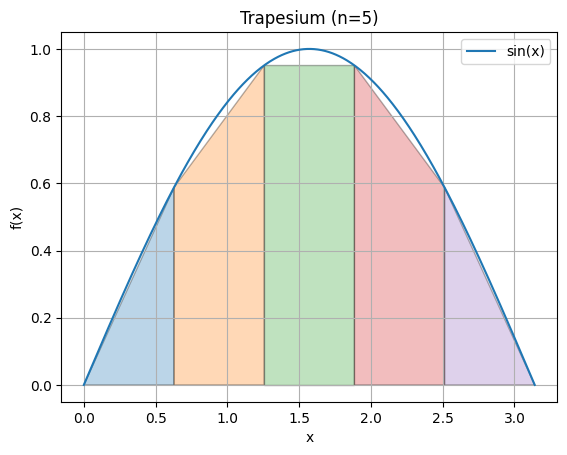

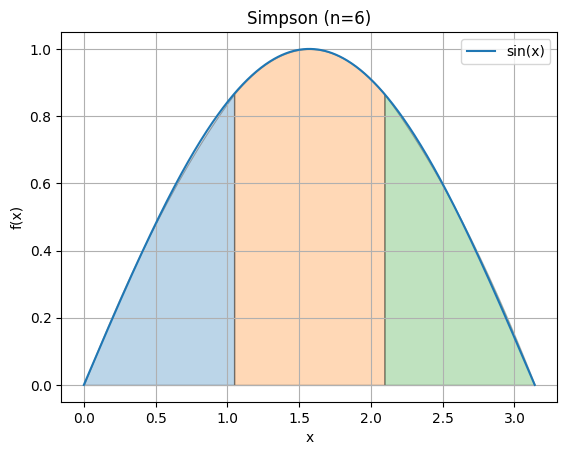

In [5]:
# Plot Trapesium n=5
n_t = 5
xs = np.linspace(a, b, n_t+1)
h_t = (b-a)/n_t
x_plot = np.linspace(a, b, 500)

plt.figure()
plt.plot(x_plot, f(x_plot), 'C0', label='sin(x)')
for i in range(n_t):
    x0, x1 = xs[i], xs[i+1]
    plt.fill([x0,x0,x1,x1],
             [0,f(x0),f(x1),0],
             edgecolor='black', alpha=0.3)
plt.title('Trapesium (n=5)')
plt.xlabel('x'); plt.ylabel('f(x)')
plt.legend(); plt.grid(True)
plt.show()

# Plot Simpson n=6
n_s = 6  # genap
xs = np.linspace(a, b, n_s+1)
h_s = (b-a)/n_s
x_plot = np.linspace(a, b, 500)

plt.figure()
plt.plot(x_plot, f(x_plot), 'C0', label='sin(x)')
for i in range(0, n_s, 2):
    x0, x1, x2 = xs[i], xs[i+1], xs[i+2]
    # koef parabola lewat (x0,f0),(x1,f1),(x2,f2)
    f0, f1, f2 = f(x0), f(x1), f(x2)
    coeffs = np.polyfit([x0,x1,x2],[f0,f1,f2],2)
    poly = np.poly1d(coeffs)
    xx = np.linspace(x0, x2, 100)
    plt.fill_between(xx, poly(xx), alpha=0.3, edgecolor='black')
plt.title("Simpson (n=6)")
plt.xlabel('x'); plt.ylabel('f(x)')
plt.legend(); plt.grid(True)
plt.show()
